### BÀI TẬP CƠ BẢN

### Bài 1: Hãy đọc dữ liệu, và cho biết các thông tin sau: </br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read data
X_train = pd.read_csv('UIT-VSFC/train.csv', index_col = None, usecols=[0])
y_train = pd.read_csv('UIT-VSFC/train.csv',index_col = None, usecols=[1,2])
X_test = pd.read_csv('UIT-VSFC/test.csv', index_col = None, usecols=[0])
y_test = pd.read_csv('UIT-VSFC/test.csv',index_col = None, usecols=[1,2])
X_dev = pd.read_csv('UIT-VSFC/dev.csv', index_col = None, usecols=[0])
y_dev = pd.read_csv('UIT-VSFC/dev.csv',index_col = None, usecols=[1,2])

a) Mục tiêu / tác vụ mà bộ dữ liệu hướng tới là gì? </br>
Mục tiêu: phân loại đánh giá của sinh viên theo topic (các nhãn lecturer - 0, curriculum - 1, facility - 2, others - 3) và phân tích cảm xúc của đánh giá (positive - 0, negative - 1, neutral - 2)

b) Kích thước của dữ liệu là bao nhiêu trên các tập train, dev và test?

In [6]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_dev = pd.concat([X_dev, y_dev], axis=1)

print('Size of train: ', df_train.shape)
print('Size of test: ', df_test.shape)
print('Size of dev: ', df_dev.shape)

Size of train:  (11426, 3)
Size of test:  (3166, 3)
Size of dev:  (1583, 3)


c) Phân bố nhãn theo từng tác vụ trên các tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên từng tập dữ liệu.

C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\4271704515.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train.sentiment.value_counts().index, y= y_train.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\4271704515.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train.topic.value_counts().index, y= y_train.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')


[Text(0.5, 1.0, 'Topic')]

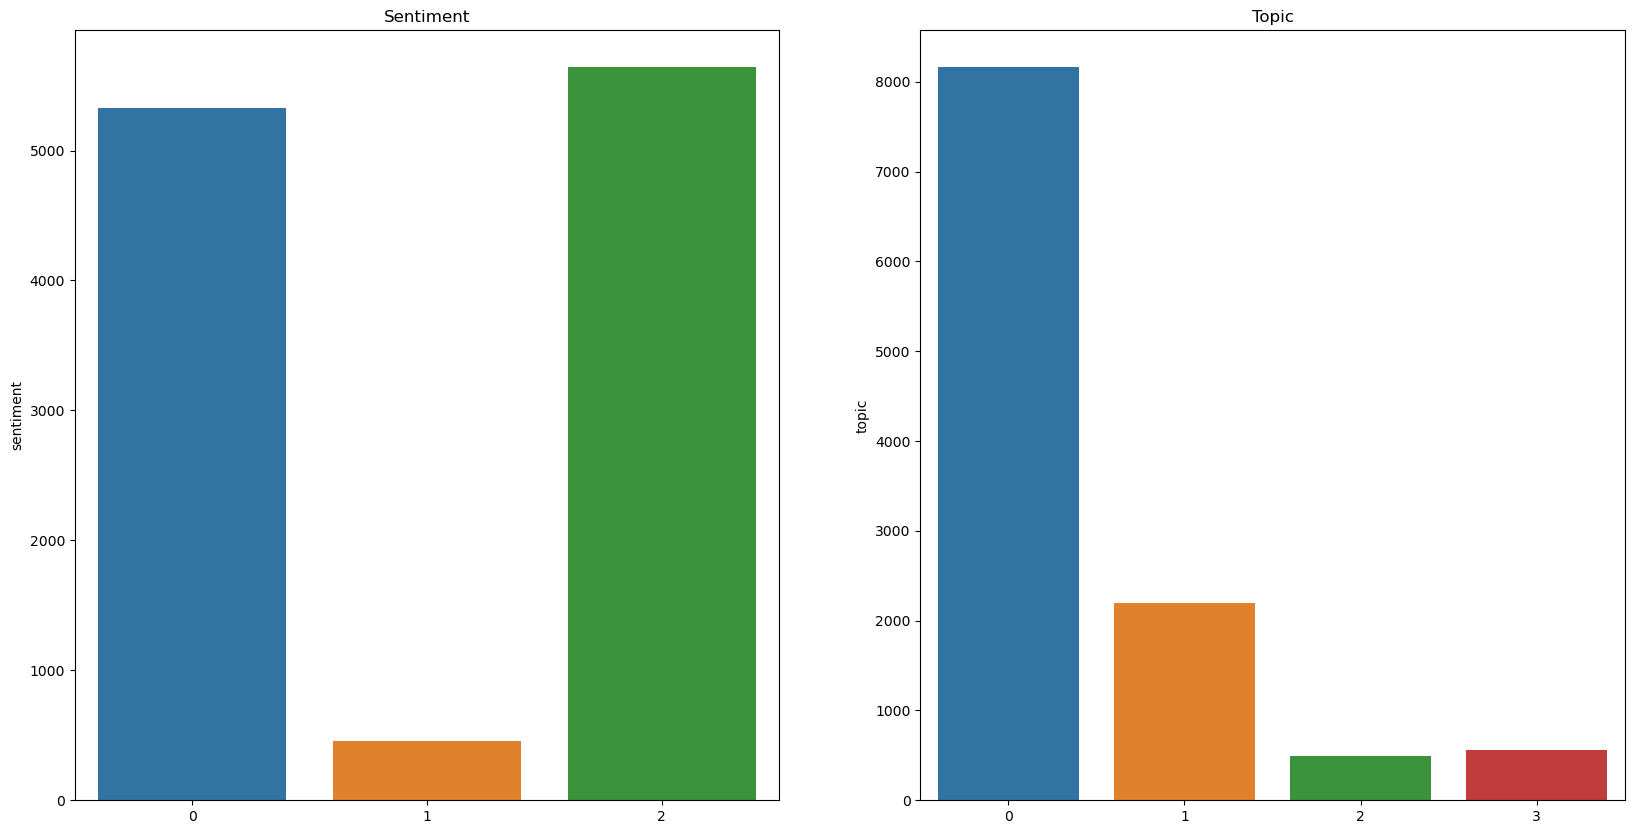

In [7]:
# train
fig, ax =plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=y_train.sentiment.value_counts().index, y= y_train.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
sns.barplot(x=y_train.topic.value_counts().index, y= y_train.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')

C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\2439138341.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_test.sentiment.value_counts().index, y= y_test.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\2439138341.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_test.topic.value_counts().index, y= y_test.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')


[Text(0.5, 1.0, 'Topic')]

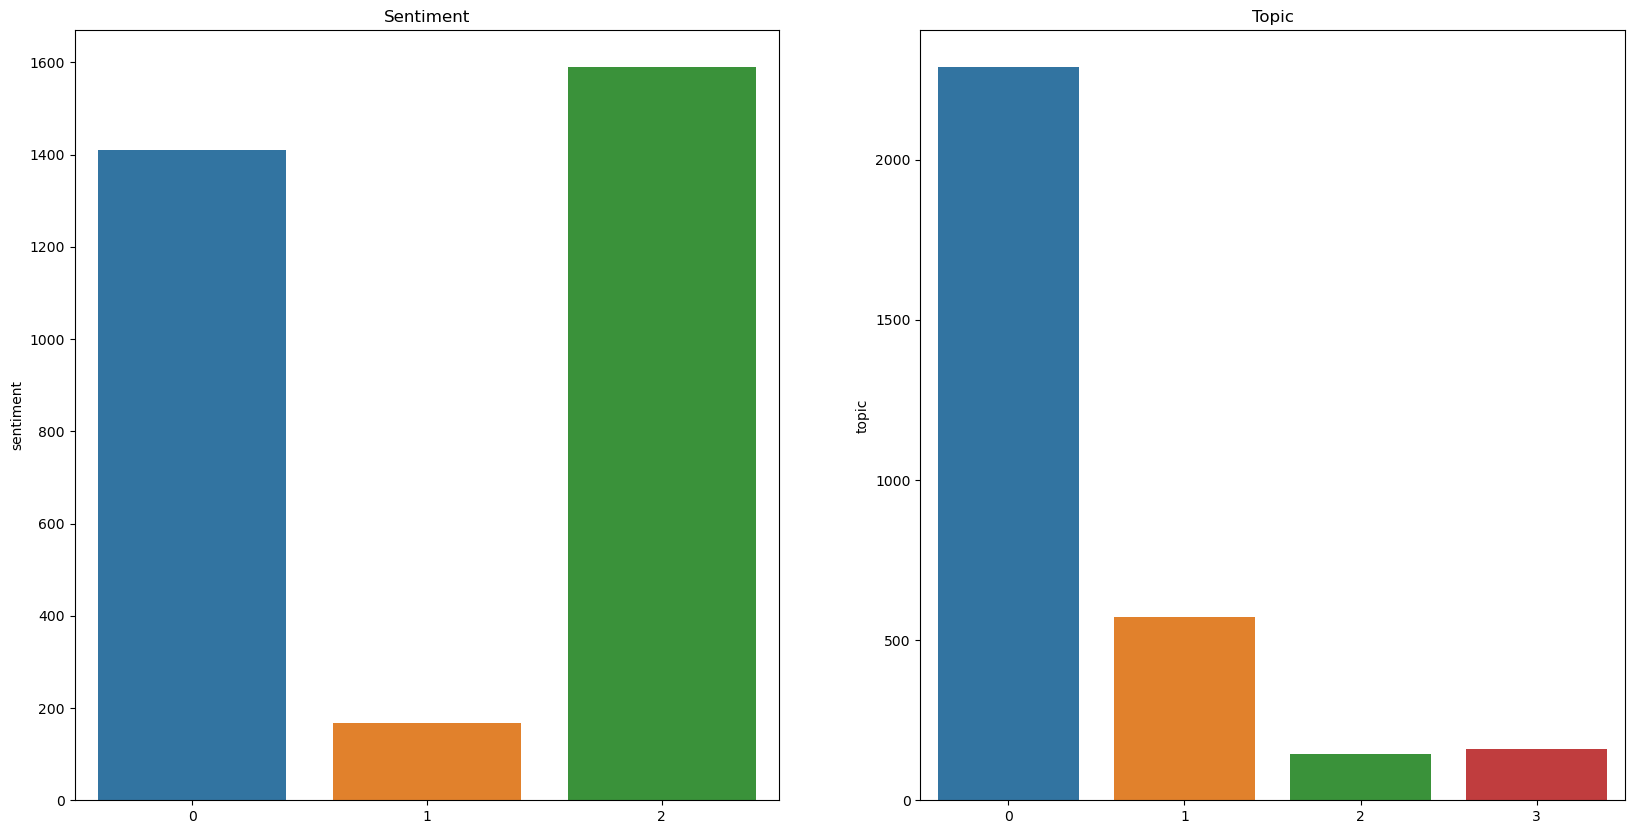

In [8]:
# test
fig, ax =plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=y_test.sentiment.value_counts().index, y= y_test.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
sns.barplot(x=y_test.topic.value_counts().index, y= y_test.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')

C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\3136623287.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_dev.sentiment.value_counts().index, y= y_dev.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
C:\Users\tinhdaubuoi\AppData\Local\Temp\ipykernel_33364\3136623287.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_dev.topic.value_counts().index, y= y_dev.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')


[Text(0.5, 1.0, 'Topic')]

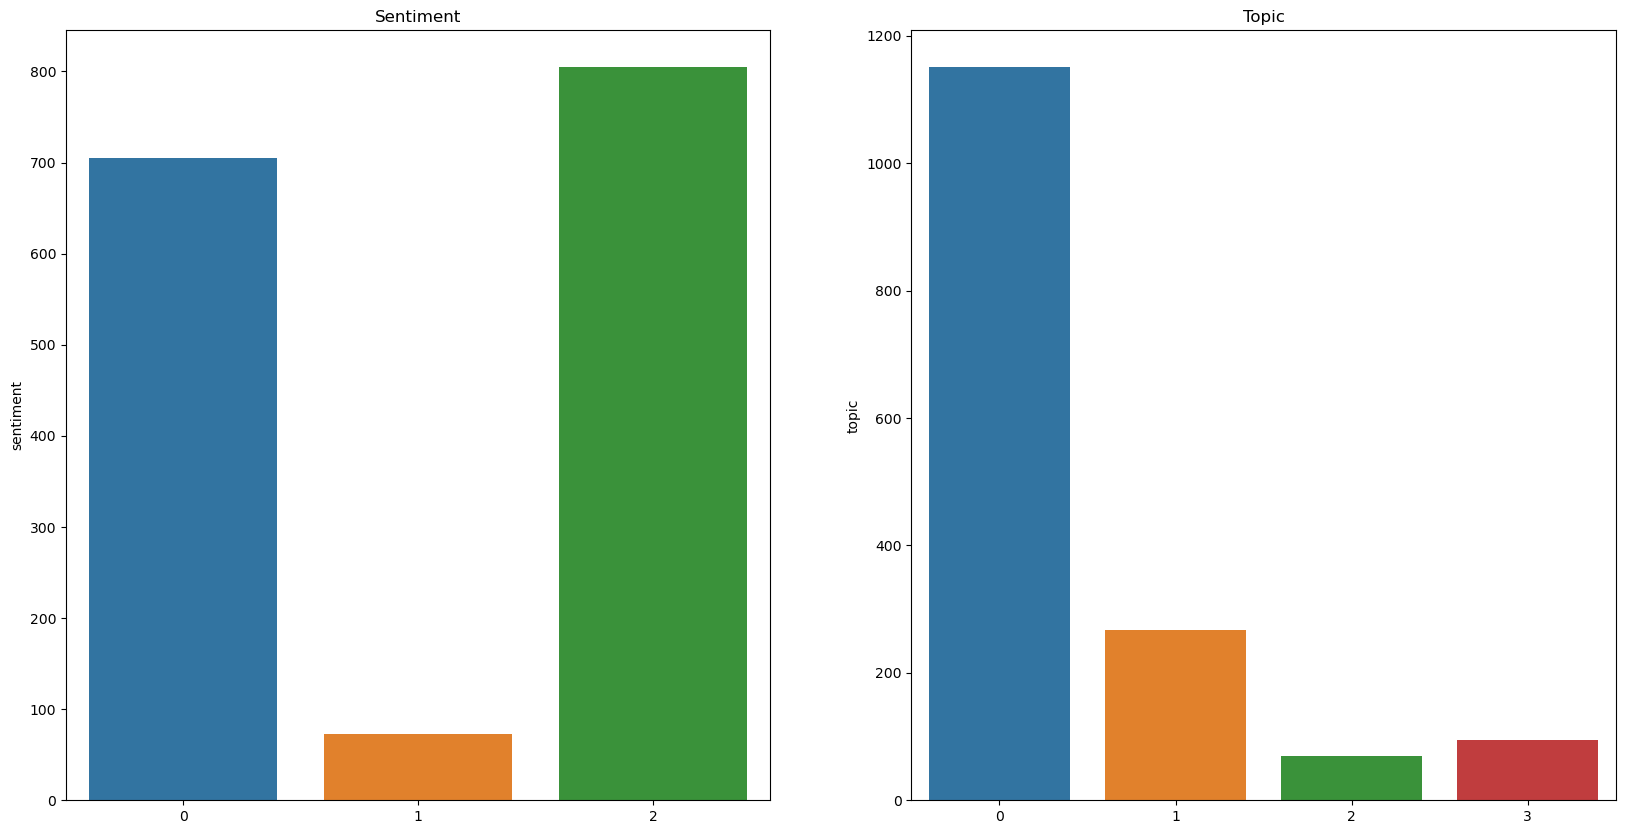

In [9]:
# dev
fig, ax =plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=y_dev.sentiment.value_counts().index, y= y_dev.sentiment.value_counts(), data = y_train, ci=None, ax = ax[0]).set(title='Sentiment')
sns.barplot(x=y_dev.topic.value_counts().index, y= y_dev.topic.value_counts(), data = y_train, ci=None, ax=ax[1]).set(title='Topic')

Bài 2: Trích xuất đặc trưng cho tác vụ sentiment-based:

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

a) Hãy dùng thư viện CountVectorizer để trích xuất đặc trưng cho dữ liệu văn bản (text).

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['sentence'])
X_train_text = vectorizer.transform(X_train['sentence'])

b) Dùng thư viện LabelEncoder để mã hoá cho dữ liệu nhãn.

In [12]:
LabelEncoder = LabelEncoder()
LabelEncoder.fit(y_train['sentiment'])
y_train_sentiment = LabelEncoder.transform(y_train['sentiment']) # 0: encode label of sentiment
LabelEncoder.fit(y_train['topic'])
y_train_topic = LabelEncoder.transform(y_train['topic']) # encode label of topic

### Bài 3: Huấn luyện mô hình: </br>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

a) Sử dụng mô hình Logistic Regression và SVM để huấn luyện.</br>


In [14]:
model1 = LogisticRegression()
model1.fit(X_train_text, y_train_sentiment)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model2 = SVC()
model2.fit(X_train_text, y_train_sentiment)

SVC()

b) Đánh giá mô hình bằng các độ đo accuracy_score, precision_score, recall_score và macro f1-score. Có nhận xét gì về hiệu năng của 2 mô hình?

Logistic Regression

In [16]:
X_test_text = vectorizer.transform(X_test['sentence'])
LabelEncoder.fit(y_test['sentiment'])
y_test_sentiment = LabelEncoder.transform(y_test['sentiment'])
print("accuracy_score: ", accuracy_score(y_test["sentiment"], model1.predict(X_test_text)))
print("precision_score: ", precision_score(y_test["sentiment"], model1.predict(X_test_text), average='macro'))
print("recall_score: ", recall_score(y_test["sentiment"], model1.predict(X_test_text), average='macro'))
print("f1_score: ", f1_score(y_test["sentiment"], model1.predict(X_test_text), average='macro'))

accuracy_score:  0.8840808591282375
precision_score:  0.7574990290782253
recall_score:  0.6861116062575138
f1_score:  0.7041924971509287


SVM

In [17]:
print("accuracy_score: ", accuracy_score(y_test["sentiment"], model2.predict(X_test_text)))
print("precision_score: ", precision_score(y_test["sentiment"], model2.predict(X_test_text), average='macro'))
print("recall_score: ", recall_score(y_test["sentiment"], model2.predict(X_test_text), average='macro'))
print("f1_score: ", f1_score(y_test["sentiment"], model2.predict(X_test_text), average='macro'))

accuracy_score:  0.8859759949463045
precision_score:  0.8134670819952211
recall_score:  0.6388055283302992
f1_score:  0.6358368786162855


Nhận xét: ở điểm accuracy cả 2 model đều cho kết quả gần tương đương nhau, trong khi đó về các điểm recall và f1 thì LR cao hơn SVM, ngược lại với điểm precision khi SVM là model cao hơn. So sánh về các chỉ số cho thấy lựa chọn LR vì độ chính xác của nó mang lại cao hơn SVM

c) Vẽ ma trận nhầm lẫn (confusion matrix) của 2 mô hình. Có nhận xét gì về ma trận nhầm lẫn giữa 2 mô hình vừa huấn luyện

Logistic Regression

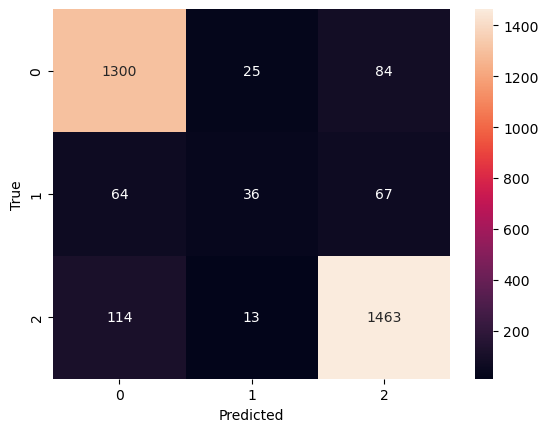

In [18]:
sns.heatmap(confusion_matrix(y_test["sentiment"], model1.predict(X_test_text)), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM

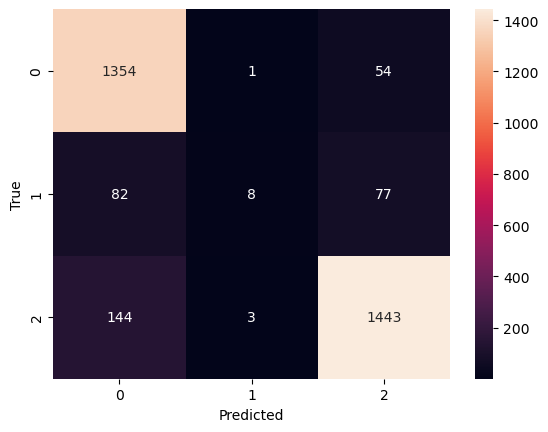

In [19]:
sns.heatmap(confusion_matrix(y_test["sentiment"], model2.predict(X_test_text)), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Tại class 1 (neutral): LR > SVM <br> Tại class 0 (negative): SVM > LR <br> Tại class 2 (positive): tương đương <br> Ở label 1 bị dự đoán nhầm nhiều nhất, ngược lại với label 2 thì dự đoán có phần chính xác hơn. Xét thấy mô hình SVM phân loại label 1 không tốt, nên ta nhận định SVM có khả năng phân loại nhị phân tốt, và nếu so với LR thì SVM có phần tốt hơn. Về LR thì mô hình này có khả năng phân loại 3 lớp tốt hơn so với SVM 1 chút tuy nhiên không nhiều.

### Bài 4: Thay CountVectorizer bằng TfidfVectorizer để trích xuất đặc trưng cho dữ liệu văn bản. Có so sánh gì giữa 2 phương pháp trích xuất đặc trưng đối với hiệu năng của mô hình phân lớp?

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(X_train['sentence'])
X_train_text_tfidf = vectorizer_tfidf.transform(X_train['sentence'])
X_test_text_tfidf = vectorizer_tfidf.transform(X_test['sentence'])

In [22]:
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_text_tfidf, y_train_sentiment)
svm_tfidf = SVC()
svm_tfidf.fit(X_train_text_tfidf, y_train_sentiment)

SVC()

In [23]:
print("logreg_tfidf accuracy_score: ", accuracy_score(y_test["sentiment"], logreg_tfidf.predict(X_test_text_tfidf)))
print("logreg_tfidf precision_score: ", precision_score(y_test["sentiment"], logreg_tfidf.predict(X_test_text_tfidf), average='macro'))
print("logreg_tfidf recall_score: ", recall_score(y_test["sentiment"], logreg_tfidf.predict(X_test_text_tfidf), average='macro'))
print("logreg_tfidf f1_score: ", f1_score(y_test["sentiment"], logreg_tfidf.predict(X_test_text_tfidf), average='macro'))

logreg_tfidf accuracy_score:  0.8809222994314593
logreg_tfidf precision_score:  0.7915430551516596
logreg_tfidf recall_score:  0.6457385241568766
logreg_tfidf f1_score:  0.6514111568382064


In [24]:
print("svm_tfidf accuracy_score: ", accuracy_score(y_test["sentiment"], svm_tfidf.predict(X_test_text_tfidf)))
print("svm_tfidf precision_score: ", precision_score(y_test["sentiment"], svm_tfidf.predict(X_test_text_tfidf), average='macro'))
print("svm_tfidf recall_score: ", recall_score(y_test["sentiment"], svm_tfidf.predict(X_test_text_tfidf), average='macro'))
print("svm_tfidf f1_score: ", f1_score(y_test["sentiment"], svm_tfidf.predict(X_test_text_tfidf), average='macro'))

svm_tfidf accuracy_score:  0.8897662665824384
svm_tfidf precision_score:  0.8769945392300164
svm_tfidf recall_score:  0.6576409081752131
svm_tfidf f1_score:  0.6680936999205618


Nhận xét: sau khi dùng TFIDF, các chỉ số của cả 2 model đều tăng, tuy nhiên model SVM tăng lên khá nhiều, và điểm số cũng cao hơn LR ở mọi loại điểm. Do đó sử dụng TFIDF có khả năng tối ưu SVM tốt hơn.

Bài 5: Lưu kết quả mô hình vừa huấn luyện thành file.

In [25]:
import pickle
pickle.dump(logreg_tfidf, open('logreg_tfidf.sav', 'wb'))
pickle.dump(svm_tfidf, open('svm_tfidf.sav', 'wb'))
pickle.dump(vectorizer_tfidf, open('vectorizer_tfidf.sav', 'wb'))
pickle.dump(model1, open('logreg.sav', 'wb'))
pickle.dump(model2, open('svm.sav', 'wb'))

## BÀI TẬP NÂNG CAO

### Bài 6: Hãy sử dụng thêm công cụ tách từ (word segmentation) cho tiếng Việt. Liệu rằng việc tách từ có ảnh hưởng tới hiệu năng của mô hình hay không?

Ở đây em sử dụng công cụ tách từ của nhóm underthesea

In [26]:
# underthesea
from underthesea import word_tokenize
from underthesea import sent_tokenize

In [27]:
X_train_underthesea = X_train.copy()
X_test_underthesea = X_test.copy()
X_dev_underthesea = X_dev.copy()

In [28]:
X_train_underthesea = X_train.copy()
X_train_underthesea['sentence'] = X_train_underthesea['sentence'].apply(lambda x: word_tokenize(x, format="text"))
X_test_underthesea = X_test.copy()
X_test_underthesea['sentence'] = X_test_underthesea['sentence'].apply(lambda x: word_tokenize(x, format="text"))
X_dev_underthesea = X_dev.copy()
X_dev_underthesea['sentence'] = X_dev_underthesea['sentence'].apply(lambda x: word_tokenize(x, format="text"))

In [29]:
X_train_underthesea["sentence"]

0                                slide giáo_trình đầy_đủ .
1           nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .
2                     đi học đầy_đủ full điểm chuyên_cần .
3        chưa áp_dụng công_nghệ_thông_tin và các thiết_...
4        thầy giảng bài hay , có nhiều bài_tập ví_dụ ng...
                               ...                        
11421    chỉ vì môn game mà em học hai lần mà không qua...
11422                                 em cảm_ơn cô nhiều .
11423                             giao bài_tập quá nhiều .
11424                 giáo_viên dạy dễ hiểu , nhiệt_tình .
11425    gói gọn doubledot hay , tận_tình , phù_hợp với...
Name: sentence, Length: 11426, dtype: object

In [30]:
vectorizer_underthesea = TfidfVectorizer()
vectorizer_underthesea.fit(X_train_underthesea['sentence'])
X_train_text_underthesea = vectorizer_underthesea.transform(X_train_underthesea['sentence'])
X_test_text_underthesea = vectorizer_underthesea.transform(X_test_underthesea['sentence'])
X_dev_text_underthesea = vectorizer_underthesea.transform(X_dev_underthesea['sentence'])

In [31]:
logreg_underthesea = LogisticRegression()
logreg_underthesea.fit(X_train_text_underthesea, y_train_sentiment)
svm_underthesea = SVC()
svm_underthesea.fit(X_train_text_underthesea, y_train_sentiment)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [32]:
print("logreg_underthesea accuracy_score: ", accuracy_score(y_test["sentiment"], logreg_underthesea.predict(X_test_text_underthesea)))
print("logreg_underthesea precision_score: ", precision_score(y_test["sentiment"], logreg_underthesea.predict(X_test_text_underthesea), average='macro'))
print("logreg_underthesea recall_score: ", recall_score(y_test["sentiment"], logreg_underthesea.predict(X_test_text_underthesea), average='macro'))
print("logreg_underthesea f1_score: ", f1_score(y_test["sentiment"], logreg_underthesea.predict(X_test_text_underthesea), average='macro'))

logreg_underthesea accuracy_score:  0.885028427037271
logreg_underthesea precision_score:  0.8076321858498366
logreg_underthesea recall_score:  0.6468660422324822
logreg_underthesea f1_score:  0.6514107474844565


In [33]:
print("svm_underthesea accuracy_score: ", accuracy_score(y_test["sentiment"], svm_underthesea.predict(X_test_text_underthesea)))
print("svm_underthesea precision_score: ", precision_score(y_test["sentiment"], svm_underthesea.predict(X_test_text_underthesea), average='macro'))
print("svm_underthesea recall_score: ", recall_score(y_test["sentiment"], svm_underthesea.predict(X_test_text_underthesea), average='macro'))
print("svm_underthesea f1_score: ", f1_score(y_test["sentiment"], svm_underthesea.predict(X_test_text_underthesea), average='macro'))

svm_underthesea accuracy_score:  0.8948199620972836
svm_underthesea precision_score:  0.8604426872047132
svm_underthesea recall_score:  0.6577187158773855
svm_underthesea f1_score:  0.6650767954566609


Nhận xét: Việc tách từ cho thấy hiệu suất của các model có tăng thêm 1 chút, tuy nhiên không nhiều.

### Bài 7: Hãy tìm cách điều chỉnh 2 siêu tham số của phương pháp trích xuất đặc trưng TfidfVectorizer là lowercase (true và false) và ngram_ range (1 đến 3). Chọn ra bộ siêu tham số tốt nhất, và cho biết kết quả độ chính xác của mô hình trên bộ siêu tham số đó.

In [34]:
#tfidf fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [35]:
#tfidf with hyperparameter tuning lowercase(true or false) and ngram_range(1 to 3)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC()),
])   
parameters = {
    'tfidf__lowercase': (True, False),
    'tfidf__ngram_range': ((1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3))
}

In [36]:
grid_search_tfidf = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search_tfidf.fit(X_train['sentence'], y_train_sentiment)
print('Best score: %0.3f' % grid_search_tfidf.best_score_)
print('Best parameters set:')
best_parameters = grid_search_tfidf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.912
Best parameters set:
	tfidf__lowercase: True
	tfidf__ngram_range: (1, 1)


In [37]:
print("tfidf_svc accuracy_score: ", accuracy_score(y_test["sentiment"], grid_search_tfidf.predict(X_test['sentence'])))
print("tfidf_svc precision_score: ", precision_score(y_test["sentiment"], grid_search_tfidf.predict(X_test['sentence']), average='macro'))
print("tfidf_svc recall_score: ", recall_score(y_test["sentiment"], grid_search_tfidf.predict(X_test['sentence']), average='macro'))
print("tfidf_svc f1_score: ", f1_score(y_test["sentiment"], grid_search_tfidf.predict(X_test['sentence']), average='macro'))

tfidf_svc accuracy_score:  0.8897662665824384
tfidf_svc precision_score:  0.8769945392300164
tfidf_svc recall_score:  0.6576409081752131
tfidf_svc f1_score:  0.6680936999205618


SVM: lowercase = True, ngram_range = (1,1)

In [38]:
#tfidf with hyperparameter tuning lowercase(true or false) and ngram_range(1 to 3)
pipeline_logreg = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression()),
])  

In [39]:
grid_search_tfidf_logreg = GridSearchCV(pipeline_logreg, parameters, n_jobs=-1, verbose=1)
grid_search_tfidf_logreg.fit(X_train['sentence'], y_train_sentiment)
print('Best score: %0.3f' % grid_search_tfidf_logreg.best_score_)
print('Best parameters set:')
best_parameters = grid_search_tfidf_logreg.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.908
Best parameters set:
	tfidf__lowercase: True
	tfidf__ngram_range: (1, 2)


LR: lowercase = True, ngram_range = (1,2)

In [40]:
print("tfidf_logreg accuracy_score: ", accuracy_score(y_test["sentiment"], grid_search_tfidf_logreg.predict(X_test['sentence'])))
print("tfidf_logreg precision_score: ", precision_score(y_test["sentiment"], grid_search_tfidf_logreg.predict(X_test['sentence']), average='macro'))
print("tfidf_logreg recall_score: ", recall_score(y_test["sentiment"], grid_search_tfidf_logreg.predict(X_test['sentence']), average='macro'))
print("tfidf_logreg f1_score: ", f1_score(y_test["sentiment"], grid_search_tfidf_logreg.predict(X_test['sentence']), average='macro'))

tfidf_logreg accuracy_score:  0.8894504106127605
tfidf_logreg precision_score:  0.8558588019419785
tfidf_logreg recall_score:  0.6468208014874902
tfidf_logreg f1_score:  0.6484631108559814


### Bài 8*: Hãy liệt kê các trường hợp dự đoán sai của mô hình. Cho biết nguyên nhân nào mô hình bị dự đoán sai. Hãy đề xuất phương pháp khắc phục (nếu có).

In [41]:
# predict
y_pred = model1.predict(X_test_text)
y_pred_tfidf = logreg_tfidf.predict(X_test_text_tfidf)
y_pred_underthesea = logreg_underthesea.predict(X_test_text_underthesea)

In [42]:
count = 0
for i in range(len(y_pred_underthesea)):
    if y_pred_underthesea[i] != y_test["sentiment"][i]:
        print("sentence:", X_test["sentence"][i])
        print("sentence after segmentation:", word_tokenize(X_test["sentence"][i], format="text"))
        print("predicted:", y_pred_underthesea[i])
        print("actual:", y_test["sentiment"][i])
        print("-------------------------------------------------")
        count += 1
    if count == 4:
        break

sentence: giáo viên không giảng dạy kiến thức , hướng dẫn thực hành trong quá trình học .

sentence after segmentation: giáo_viên không giảng_dạy kiến_thức , hướng_dẫn thực_hành trong quá_trình học .
predicted: 2
actual: 0
-------------------------------------------------
sentence: tính điểm thi đua các nhóm .

sentence after segmentation: tính điểm thi_đua các nhóm .
predicted: 1
actual: 2
-------------------------------------------------
sentence: trong trường macbook thầy số hai thì không có máy nào số một .

sentence after segmentation: trong trường macbook thầy_số hai thì không có máy nào số_một .
predicted: 0
actual: 2
-------------------------------------------------
sentence: cách mà cô tiếp cận với sinh viên .

sentence after segmentation: cách mà cô tiếp_cận với sinh_viên .
predicted: 2
actual: 1
-------------------------------------------------


Câu 1: giáo_viên không giảng_dạy kiến_thức , hướng_dẫn thực_hành trong quá_trình học . predicted: 0, actual: 2 <br>
Trong vế đầu "giáo viên không giảng dạy kiến thức" nếu loại bỏ từ "không" thì sẽ trở thành câu positive, còn vế sau thì hoàn toàn có thể nhận diện là positive luôn. Câu này khó có thể nhận diện về ngữ nghĩa nếu cả 2 câu không đồng nhất với nhau. Nếu sử dụng thêm chữ "không" cho vế sau thì khả năng dự đoán đúng có thể tăng lên nhiều.

Câu 2: tính điểm thi_đua các nhóm . predicted: 1, actual: 2 <br>
Câu này không rõ ý nghĩa và không mang tính cảm xúc, máy không thể nhận diện. Nên huỷ những câu như thế này vì nó không tập trung vào thể hiện cảm xúc, máy học sẽ bị sai.

Câu 3: trong trường macbook thầy_số hai thì không có máy nào số_một . predicted: 0, actual: 2 <br>
Máy đã tách sai từ, do đó việc nhận diện sai là hoàn toàn bình thường. Ngoài ra câu này còn thiếu nhiều thành phần trong câu dẫn đến dự đoán không đúng.

Câu 4: cách mà cô tiếp_cận với sinh_viên . predicted: 2, actual: 1 <br>
Câu khá ngắn, thiếu vị ngữ -> không đủ dữ kiện để nhận xét. Nên cho máy học thêm nhiều câu như vậy.
